In [83]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from imblearn.under_sampling import TomekLinks
from IPython.display import Markdown, display
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.patches as mpatches
def printmd(string):
    display(Markdown(string))

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [65]:
df = pd.read_csv('train.csv')

# Reading and printing all the features

In [66]:
columnNames = df.columns
print(columnNames)
feature = len(df.columns)
print('The total number of features are ', feature-2)

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


# How many categorical,binary and continuous variable?

In [67]:
# getting the list of categorical variables and one-hot encoding
import re
categorical = 0
categorical_features = []
binary = 0
binary_features = []
continuous = 0
continuous_features = []
for each in columnNames[2:]:
    if(re.search(r'cat$',each)):
        categorical = categorical+1
        categorical_features.append(each)
    elif (re.search(r'bin$',each)):
        binary = binary+1
        binary_features.append(each)
    else:
        continuous = continuous+1
        continuous_features.append(each)

print('Total categorical features are ', categorical)
print('Total binary features are ', binary)
print('Total continuous features are ', continuous)


Total categorical features are  14
Total binary features are  17
Total continuous features are  26


Index(['id', 'target', 'ps_ind_01', 'ps_ind_03', 'ps_ind_06_bin',
       'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin',
       'ps_ind_11_bin',
       ...
       'ps_car_11_cat_95', 'ps_car_11_cat_96', 'ps_car_11_cat_97',
       'ps_car_11_cat_98', 'ps_car_11_cat_99', 'ps_car_11_cat_100',
       'ps_car_11_cat_101', 'ps_car_11_cat_102', 'ps_car_11_cat_103',
       'ps_car_11_cat_104'],
      dtype='object', length=229)

Creating a baseline model (random forest) with all the features and see how it performs, when all the data is dumped in it.

# Implementing a  Random Forest

The accuracy in % is  96.3164570785
Confusion matrix, without normalization
[[114655      3]
 [  4382      3]]


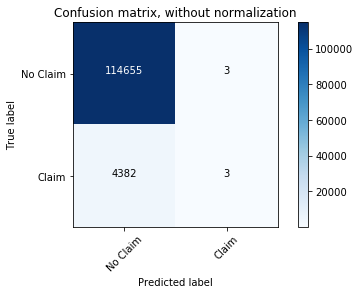

In [171]:
# Implementing a Random Forest Classifier by dumping all data in it, no cleaning and no pre-processing.
dfcat = pd.get_dummies(df, columns=categorical_features)
dfcat.columnsdfcat =dfcat.replace(-1,0)
target = dfcat.target
train = dfcat.drop(['id','target'], axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.20, random_state=42)
clf = RandomForestClassifier(n_jobs=-1, random_state=0)
clf.fit(train_sub, train_sub_target)
lai = clf.predict(testing)
scores = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

Even if we see accuracy is 96.31%, we can see from confusion matrix that all the labels for claim class has been misclasifed.      
Hence, our model performs very bad.

In [ ]:
testframecat = pd.read_csv('test.csv')
#testframecat = pd.get_dummies(testframe, columns=categorical_features)
testframecat= testframecat.drop('id',axis =1 )
testframecat= testframecat.drop(categorical_features,axis =1 )
result = clf.predict_proba(testframecat)
cia = []
for each in result:
    cia.append(each[1])
resultframe = pd.DataFrame(np.array(cia), columns = ['target'])
resultframe.to_csv('result19.csv', index=False)

# result is 0.065

Lets try only the binary features in the data set and see how the performance is.

The accuracy in % is  96.3105768504
Confusion matrix, without normalization
[[114651      7]
 [  4385      0]]


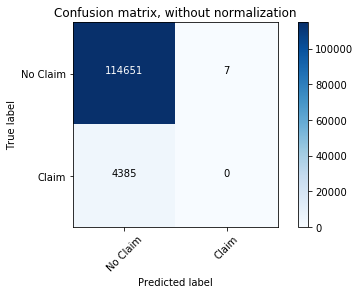

In [174]:
dfbin = df[binary_features]
train_sub, testing, train_sub_target, testing_target = train_test_split(dfbin, target, test_size=0.20, random_state=42)
clf2 = RandomForestClassifier(n_jobs=-1, random_state=0)
clf2.fit(train_sub, train_sub_target)
lai = clf2.predict(testing)
scores = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

NO improvemnt in perormance at all.

In [ ]:
# testing on the Real data set-
testframe = pd.read_csv('test.csv')
testframebin = testframe[binary_features]
result = clf2.predict_proba(testframebin)
cia = []
for each in result:
    cia.append(each[1])
resultframe = pd.DataFrame(np.array(cia), columns = ['target'])
resultframe.to_csv('resultaa.csv', index=False)
#resulting in .114

# Under Sampling the 'No Claim' class

The accuracy in % is  72.1821631879
Confusion matrix, without normalization
[[5648   57]
 [2142   58]]


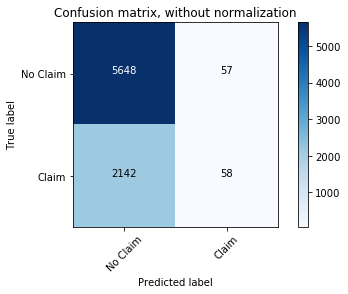

In [176]:
# Under Sampling the majority class and see if there is improvement in the results.
df = pd.read_csv('train.csv')
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id','target'], axis =1)

train = pd.get_dummies(train, columns=categorical_features)
train
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.1, random_state=42)
clf = RandomForestClassifier(n_jobs=-1, random_state=0,  n_estimators =100)
clf.fit(train_sub, train_sub_target)
lai =[]
lai = clf.predict(testing)
scores = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

The performance is some what better than the previous one, we are able to classify 58 claim class correctly.

The accuracy in % is  72.1821631879
Confusion matrix, without normalization
[[5658   47]
 [2140   60]]


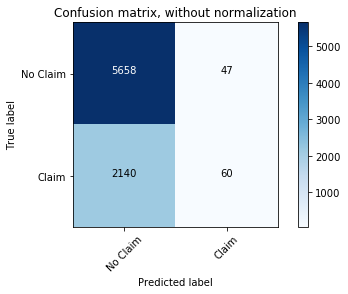

In [177]:
# let's remove all the categorical features (using our assumption from previou study that they are not useful)-

df = pd.read_csv('train.csv')
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
dfsampled = dfsampled.drop(['id', 'target'],axis =1)
train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf2 = RandomForestClassifier(n_jobs=-1, random_state=0,  n_estimators =100)
clf2.fit(train_sub, train_sub_target)
lai = []
lai = clf2.predict(testing)
scores2 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

The Performance is same, a small improvement from the last one.

The accuracy in % is  72.0556609741
Confusion matrix, without normalization
[[5651   54]
 [2155   45]]


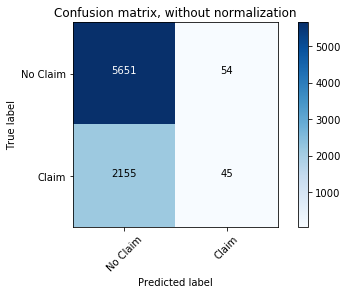

In [178]:
# Removing everything and just using the binary variables-
df = pd.read_csv('train.csv')
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
dfsampled = dfsampled.drop(['id', 'target'],axis =1)
train = dfsampled.drop(categorical_features, axis =1)
train = train.drop(continuous_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf3 = RandomForestClassifier(n_jobs=-1, random_state=0,  n_estimators =100)
clf3.fit(train_sub, train_sub_target)
lai = []
lai = clf3.predict(testing)
scores3 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores3 * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

Performance degrades

# Using the PCA in random forest.

The accuracy in % is  71.9797596458
Confusion matrix, without normalization
[[5585  120]
 [2095  105]]


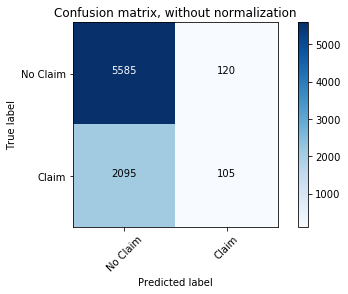

In [179]:
# Using PCA for the Continuous variable and removing the categorical variables-

df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df['PC3'] = X1[:,2] 
df['PC4'] = X1[:,3] 
df['PC5'] = X1[:,4] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf4 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators =400, max_depth = 80)
clf4.fit(train_sub, train_sub_target)
lai = []
lai = clf4.predict(testing)
scores4 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores4 * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

Performance improves a little bit, we will try with different number of PC now.

The accuracy in % is  67.6913345984
Confusion matrix, without normalization
[[5020  685]
 [1869  331]]


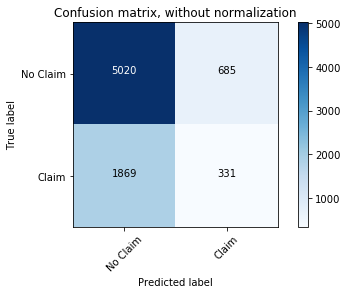

In [180]:
#decreasing the pca to 2
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=2)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf4 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators =400, max_depth = 80)
clf4.fit(train_sub, train_sub_target)
lai = []
lai = clf4.predict(testing)
scores4 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores4 * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

This has a better accuracy, now lets try with large number of PC, so we can conclude what is the optimum number of PC's

The accuracy in % is  72.2074636306
Confusion matrix, without normalization
[[5645   60]
 [2137   63]]


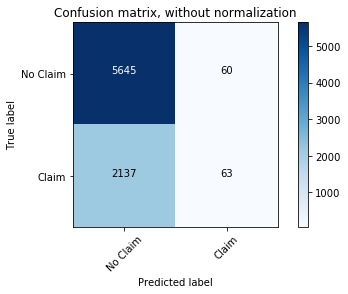

In [181]:
#increase the pca to 10
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=10)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df['PC3'] = X1[:,2] 
df['PC4'] = X1[:,3]
df['PC5'] = X1[:,4] 
df['PC6'] = X1[:,5]
df['PC7'] = X1[:,6] 
df['PC8'] = X1[:,7]
df['PC9'] = X1[:,8] 
df['PC10'] = X1[:,9]
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf4 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators =400, max_depth = 80)
clf4.fit(train_sub, train_sub_target)
lai = []
lai = clf4.predict(testing)
scores4 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores4 * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

The performance degrades, hence we decide to stick with less number of PC, one final try with only 1 PC.

0.616571790006
Confusion matrix, without normalization
[[4254 1451]
 [1580  620]]


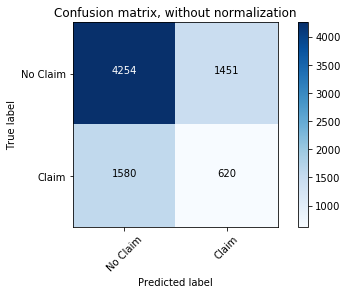

In [182]:
#try with 1 pca
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=1)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf4 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators =400, max_depth = 80)
clf4.fit(train_sub, train_sub_target)
lai = []
lai = clf4.predict(testing)
scores4 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores4 * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

There is a trade off in the performance. overall performance goes down.

# Implementing the Ensemble Learning -

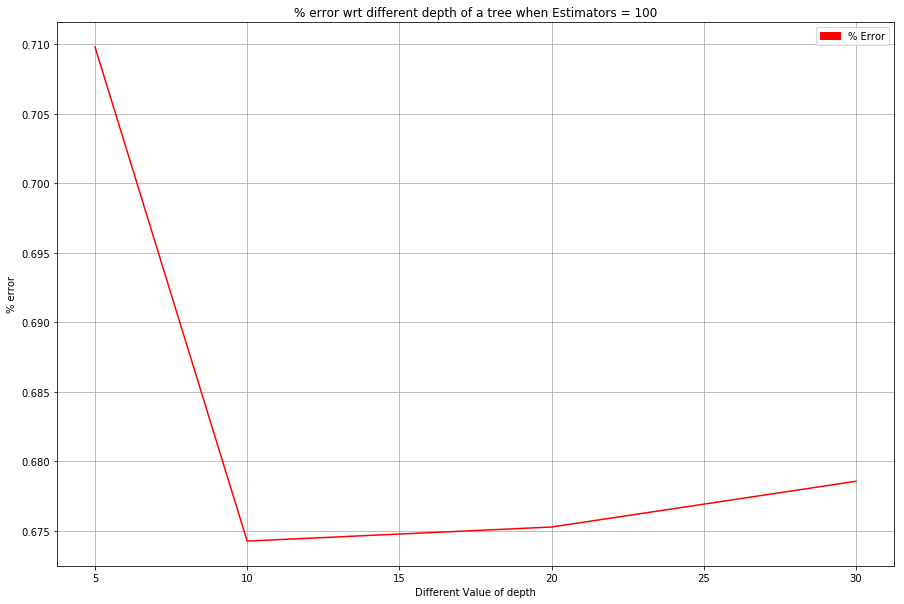

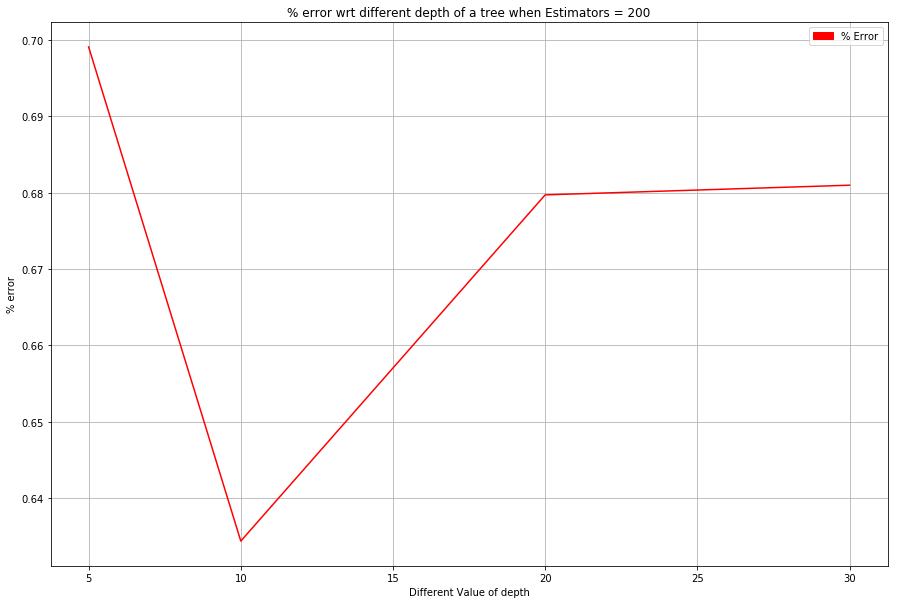

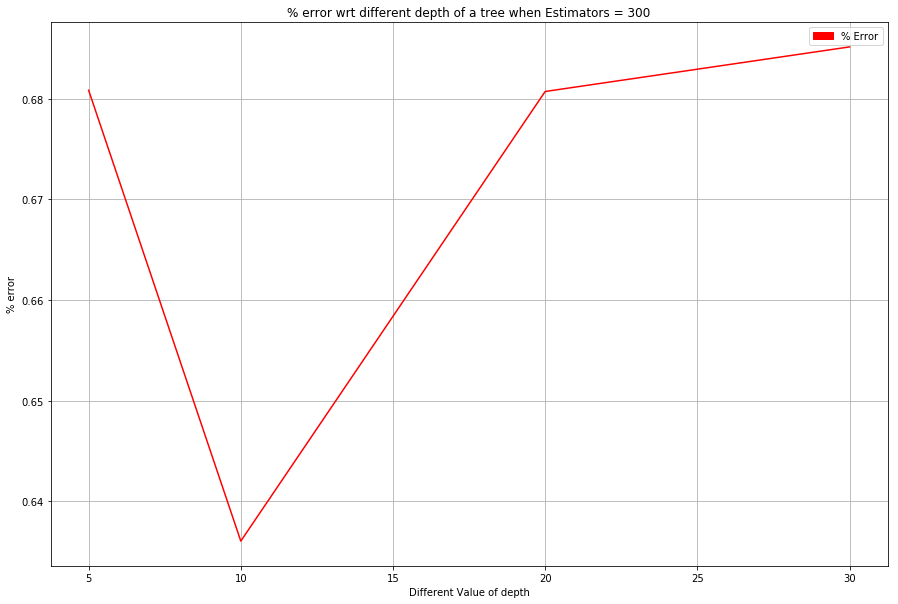

In [186]:
#Lts try  ensemble learning -
#$ trying with 2 pca only---
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=2)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)


rng = np.random.RandomState(1)
absList = []
depths = [5,10,20,30]
estimators = [100,200,300]
for eachEstimator in estimators:
    absList = []
    for depth in depths:
        regr_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),n_estimators=eachEstimator, random_state=rng)
        regr_1.fit(train_sub, train_sub_target)
        y_1 = regr_1.predict(testing)
        #s = (y_1 - math_target_test.values)
        #s = abs(s)
        #soap = s.sum()
        absoluteError = accuracy_score(testing_target, y_1) 
        absList.append(absoluteError)
    plt.figure(figsize=(15,10))
    plt.plot(depths,absList, color = 'r')
    plt.xlabel('Different Value of depth')
    plt.ylabel('% error')
    red_patch = mpatches.Patch(color='r', label='% Error')
    plt.legend(handles=[red_patch])
    xString = '% error wrt different depth of a tree when Estimators = ' + str(eachEstimator)
    plt.title(xString)
    plt.grid()
    plt.show()

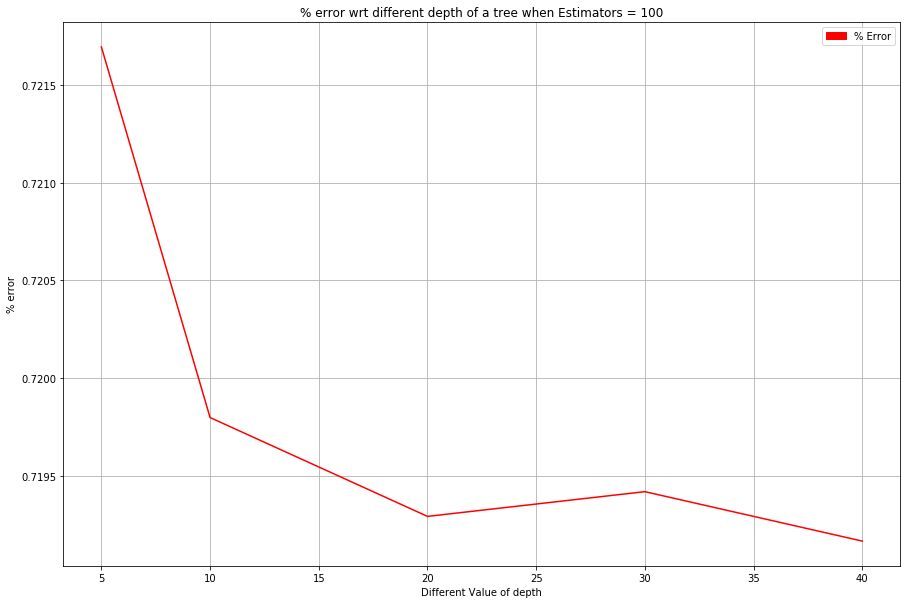

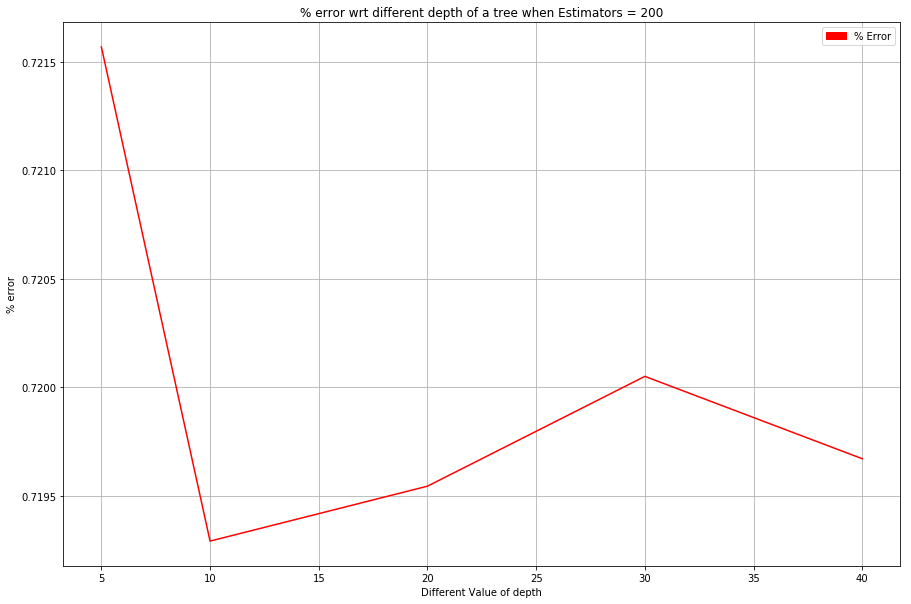

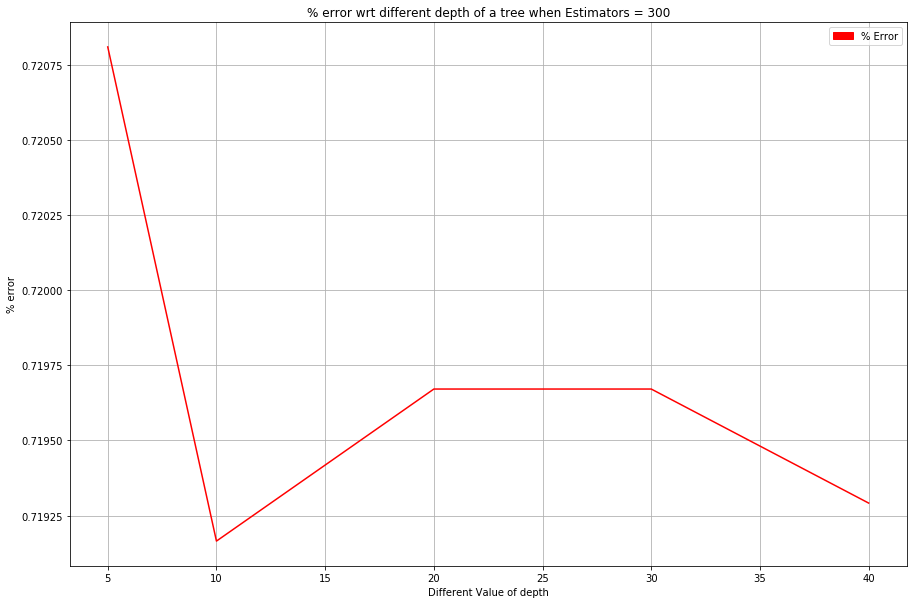

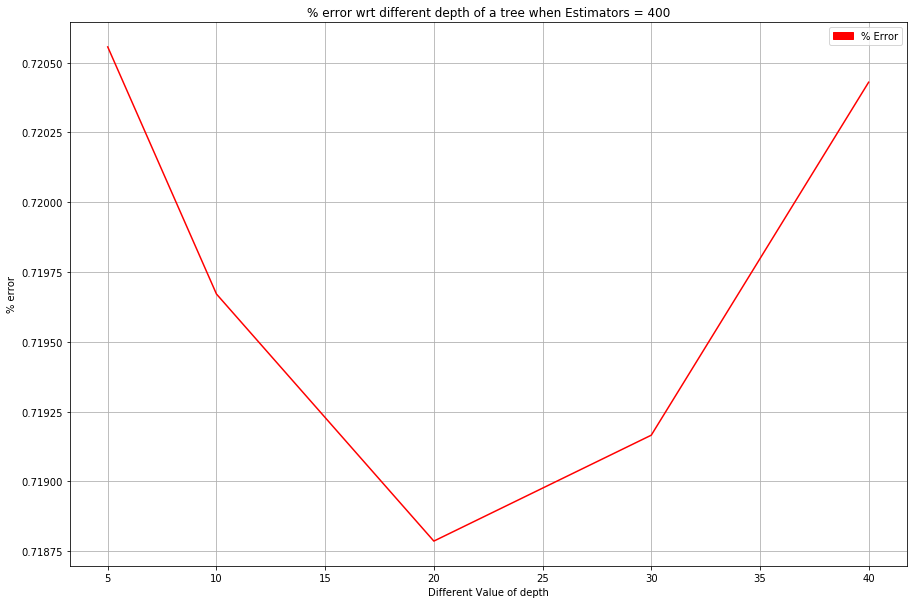

In [126]:
# Just using all binary variables-
df = pd.read_csv('train.csv')

df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)

df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)


rng = np.random.RandomState(1)
absList = []
depths = [5,10,20,30,40]
estimators = [100,200,300,400]
for eachEstimator in estimators:
    absList = []
    for depth in depths:
        regr_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),n_estimators=eachEstimator, random_state=rng)
        regr_1.fit(train_sub, train_sub_target)
        y_1 = regr_1.predict(testing)
        #s = (y_1 - math_target_test.values)
        #s = abs(s)
        #soap = s.sum()
        absoluteError = accuracy_score(testing_target, y_1) 
        absList.append(absoluteError)
    plt.figure(figsize=(15,10))
    plt.plot(depths,absList, color = 'r')
    plt.xlabel('Different Value of depth')
    plt.ylabel('% error')
    red_patch = mpatches.Patch(color='r', label='% Error')
    plt.legend(handles=[red_patch])
    xString = '% error wrt different depth of a tree when Estimators = ' + str(eachEstimator)
    plt.title(xString)
    plt.grid()
    plt.show()

# Deep Learning Model

Train on 71141 samples, validate on 7905 samples
Epoch 1/10
71141/71141 [==============================] - 6s - loss: 0.5726 - acc: 0.7263 - val_loss: 0.5714 - val_acc: 0.7216
Epoch 2/10
71141/71141 [==============================] - 5s - loss: 0.5648 - acc: 0.7279 - val_loss: 0.5699 - val_acc: 0.7218
Epoch 3/10
71141/71141 [==============================] - 5s - loss: 0.5615 - acc: 0.7304 - val_loss: 0.5696 - val_acc: 0.7238
Epoch 4/10
71141/71141 [==============================] - 5s - loss: 0.5578 - acc: 0.7337 - val_loss: 0.5711 - val_acc: 0.7225
Epoch 5/10
71141/71141 [==============================] - 5s - loss: 0.5521 - acc: 0.7382 - val_loss: 0.5763 - val_acc: 0.7225
Epoch 6/10
71141/71141 [==============================] - 5s - loss: 0.5453 - acc: 0.7421 - val_loss: 0.5749 - val_acc: 0.7212
Epoch 7/10
71141/71141 [==============================] - 5s - loss: 0.5345 - acc: 0.7490 - val_loss: 0.5896 - val_acc: 0.7164
Epoch 8/10
71141/71141 [==============================] - 5s -

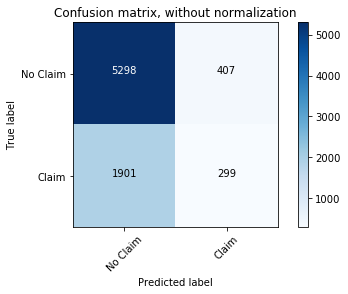

In [185]:
# Time to apply the deep learning library and benchmark

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# let's throw everything to teh deep DNN-
df = pd.read_csv('train.csv')
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.1, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id','target'], axis =1)

train = pd.get_dummies(train, columns=categorical_features)
train
train= train.values
train = scale(train)
#train = pd.get_dummies(train, columns=categorical_features)
#train
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)

#tb = train_sub.values
train_subValues = train_sub
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_sub_target)
encoded_Y = encoder.transform(train_sub_target)
train_sub_target = np_utils.to_categorical(train_sub_target)
#testing_target = np_utils.to_categorical(testing_target)
#num_classes = testing_target.shape[1]
#num_classes

# baseline model

# create model
model = Sequential()
model.add(Dense(256, input_dim=219, kernel_initializer='normal', activation='relu'))
model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_subValues, encoded_Y,epochs = 10,validation_data  = (testing,testing_target))

predictions = model.predict_classes(testing)
#encoder = LabelEncoder()
#encoder.fit(testing_target)
#encoded_target = encoder.transform(testing_target)
scores = accuracy_score(testing_target, predictions) 
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, predictions)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

In [161]:
df = pd.read_csv('train.csv')
#dfcont = df[continuous_features]
#X=dfcont.values
#Scaling the values
#X = scale(X)
#pca = PCA(n_components=2)
#pca.fit(X)
#X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
#df['PC1'] = X1[:,0] 
#df['PC2'] = X1[:,1] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)

#train = pd.get_dummies(train, columns=categorical_features)
#train
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)

tb = train_sub.values
train_subValues = tb[:,0:219].astype(float)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_sub_target)
encoded_Y = encoder.transform(train_sub_target)
testing = testing.values


# baseline model

# create model
model = Sequential()
model.add(Dense(256, input_dim=17, kernel_initializer='normal', activation='relu'))
model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_subValues, encoded_Y,epochs = 500,validation_data  = (testing,testing_target))


Train on 71141 samples, validate on 7905 samples
Epoch 1/500
71141/71141 [==============================] - 4s - loss: 0.5832 - acc: 0.7260 - val_loss: 0.5901 - val_acc: 0.7217
Epoch 2/500
71141/71141 [==============================] - 3s - loss: 0.5810 - acc: 0.7260 - val_loss: 0.5837 - val_acc: 0.7217
Epoch 3/500
71141/71141 [==============================] - 3s - loss: 0.5804 - acc: 0.7260 - val_loss: 0.5837 - val_acc: 0.7217
Epoch 4/500
71141/71141 [==============================] - 3s - loss: 0.5802 - acc: 0.7260 - val_loss: 0.5845 - val_acc: 0.7217
Epoch 5/500
71141/71141 [==============================] - 3s - loss: 0.5799 - acc: 0.7260 - val_loss: 0.5862 - val_acc: 0.7217
Epoch 6/500
71141/71141 [==============================] - 3s - loss: 0.5799 - acc: 0.7260 - val_loss: 0.5836 - val_acc: 0.7217
Epoch 7/500
71141/71141 [==============================] - 3s - loss: 0.5796 - acc: 0.7260 - val_loss: 0.5855 - val_acc: 0.7217
Epoch 8/500
71141/71141 [==============================

71141/71141 [==============================] - 3s - loss: 0.5724 - acc: 0.7283 - val_loss: 0.6016 - val_acc: 0.7209
Epoch 65/500
71141/71141 [==============================] - 3s - loss: 0.5723 - acc: 0.7282 - val_loss: 0.5944 - val_acc: 0.7204
Epoch 66/500
71141/71141 [==============================] - 3s - loss: 0.5723 - acc: 0.7286 - val_loss: 0.5961 - val_acc: 0.7207
Epoch 67/500
71141/71141 [==============================] - 3s - loss: 0.5720 - acc: 0.7288 - val_loss: 0.5978 - val_acc: 0.7203
Epoch 68/500
71141/71141 [==============================] - 3s - loss: 0.5723 - acc: 0.7287 - val_loss: 0.5927 - val_acc: 0.7203
Epoch 69/500
71141/71141 [==============================] - 3s - loss: 0.5719 - acc: 0.7288 - val_loss: 0.5921 - val_acc: 0.7208
Epoch 70/500
71141/71141 [==============================] - 3s - loss: 0.5721 - acc: 0.7287 - val_loss: 0.5946 - val_acc: 0.7195
Epoch 71/500
71141/71141 [==============================] - 3s - loss: 0.5720 - acc: 0.7286 - val_loss: 0.5977

71141/71141 [==============================] - 3s - loss: 0.5703 - acc: 0.7291 - val_loss: 0.6097 - val_acc: 0.7185
Epoch 128/500
71141/71141 [==============================] - 3s - loss: 0.5706 - acc: 0.7288 - val_loss: 0.6072 - val_acc: 0.7201
Epoch 129/500
71141/71141 [==============================] - 3s - loss: 0.5705 - acc: 0.7291 - val_loss: 0.6151 - val_acc: 0.7197
Epoch 130/500
71141/71141 [==============================] - 3s - loss: 0.5708 - acc: 0.7287 - val_loss: 0.6042 - val_acc: 0.7194
Epoch 131/500
71141/71141 [==============================] - 3s - loss: 0.5704 - acc: 0.7291 - val_loss: 0.6165 - val_acc: 0.7195
Epoch 132/500
71141/71141 [==============================] - 3s - loss: 0.5714 - acc: 0.7291 - val_loss: 0.6086 - val_acc: 0.7199
Epoch 133/500
71141/71141 [==============================] - 3s - loss: 0.5704 - acc: 0.7291 - val_loss: 0.6130 - val_acc: 0.7195
Epoch 134/500
71141/71141 [==============================] - 3s - loss: 0.5709 - acc: 0.7289 - val_loss:

71141/71141 [==============================] - 3s - loss: 0.5701 - acc: 0.7292 - val_loss: 0.6229 - val_acc: 0.7203
Epoch 190/500
71141/71141 [==============================] - 3s - loss: 0.5708 - acc: 0.7292 - val_loss: 0.6123 - val_acc: 0.7208
Epoch 191/500
71141/71141 [==============================] - 3s - loss: 0.5703 - acc: 0.7293 - val_loss: 0.6198 - val_acc: 0.7204
Epoch 192/500
71141/71141 [==============================] - 3s - loss: 0.5703 - acc: 0.7291 - val_loss: 0.6243 - val_acc: 0.7207
Epoch 193/500
71141/71141 [==============================] - 3s - loss: 0.5705 - acc: 0.7289 - val_loss: 0.6123 - val_acc: 0.7203
Epoch 194/500
71141/71141 [==============================] - 3s - loss: 0.5711 - acc: 0.7288 - val_loss: 0.6146 - val_acc: 0.7211
Epoch 195/500
71141/71141 [==============================] - 3s - loss: 0.5703 - acc: 0.7291 - val_loss: 0.6102 - val_acc: 0.7209
Epoch 196/500
71141/71141 [==============================] - 3s - loss: 0.5710 - acc: 0.7293 - val_loss:

71141/71141 [==============================] - 3s - loss: 0.5703 - acc: 0.7292 - val_loss: 0.6259 - val_acc: 0.7202
Epoch 253/500
71141/71141 [==============================] - 3s - loss: 0.5709 - acc: 0.7287 - val_loss: 0.6329 - val_acc: 0.7199
Epoch 254/500
71141/71141 [==============================] - 3s - loss: 0.5707 - acc: 0.7291 - val_loss: 0.6284 - val_acc: 0.7199
Epoch 255/500
71141/71141 [==============================] - 3s - loss: 0.5703 - acc: 0.7293 - val_loss: 0.6223 - val_acc: 0.7195
Epoch 256/500
71141/71141 [==============================] - 3s - loss: 0.5700 - acc: 0.7292 - val_loss: 0.6236 - val_acc: 0.7206
Epoch 257/500
71141/71141 [==============================] - 3s - loss: 0.5704 - acc: 0.7291 - val_loss: 0.6216 - val_acc: 0.7197
Epoch 258/500
71141/71141 [==============================] - 3s - loss: 0.5701 - acc: 0.7290 - val_loss: 0.6228 - val_acc: 0.7195
Epoch 259/500
71141/71141 [==============================] - 3s - loss: 0.5709 - acc: 0.7288 - val_loss:

71141/71141 [==============================] - 3s - loss: 0.5706 - acc: 0.7289 - val_loss: 0.6222 - val_acc: 0.7197
Epoch 316/500
71141/71141 [==============================] - 3s - loss: 0.5705 - acc: 0.7292 - val_loss: 0.6223 - val_acc: 0.7204
Epoch 317/500
71141/71141 [==============================] - 3s - loss: 0.5706 - acc: 0.7291 - val_loss: 0.6160 - val_acc: 0.7199
Epoch 318/500
71141/71141 [==============================] - 3s - loss: 0.5704 - acc: 0.7288 - val_loss: 0.6239 - val_acc: 0.7199
Epoch 319/500
71141/71141 [==============================] - 3s - loss: 0.5705 - acc: 0.7290 - val_loss: 0.6271 - val_acc: 0.7216
Epoch 320/500
71141/71141 [==============================] - 3s - loss: 0.5711 - acc: 0.7290 - val_loss: 0.6252 - val_acc: 0.7194
Epoch 321/500
71141/71141 [==============================] - 3s - loss: 0.5707 - acc: 0.7288 - val_loss: 0.6304 - val_acc: 0.7188
Epoch 322/500
71141/71141 [==============================] - 4s - loss: 0.5709 - acc: 0.7290 - val_loss:

71141/71141 [==============================] - 4s - loss: 0.5708 - acc: 0.7291 - val_loss: 0.6235 - val_acc: 0.7211
Epoch 379/500
71141/71141 [==============================] - 4s - loss: 0.5697 - acc: 0.7293 - val_loss: 0.6399 - val_acc: 0.7198
Epoch 380/500
71141/71141 [==============================] - 4s - loss: 0.5709 - acc: 0.7289 - val_loss: 0.6202 - val_acc: 0.7203
Epoch 381/500
71141/71141 [==============================] - 4s - loss: 0.5708 - acc: 0.7288 - val_loss: 0.6429 - val_acc: 0.7199
Epoch 382/500
71141/71141 [==============================] - 3s - loss: 0.5701 - acc: 0.7293 - val_loss: 0.6353 - val_acc: 0.7199
Epoch 383/500
71141/71141 [==============================] - 4s - loss: 0.5703 - acc: 0.7292 - val_loss: 0.6199 - val_acc: 0.7195
Epoch 384/500
71141/71141 [==============================] - 3s - loss: 0.5710 - acc: 0.7289 - val_loss: 0.6399 - val_acc: 0.7198
Epoch 385/500
71141/71141 [==============================] - 3s - loss: 0.5711 - acc: 0.7287 - val_loss:

71141/71141 [==============================] - 4s - loss: 0.5699 - acc: 0.7287 - val_loss: 0.6325 - val_acc: 0.7197
Epoch 441/500
71141/71141 [==============================] - 4s - loss: 0.5710 - acc: 0.7288 - val_loss: 0.6211 - val_acc: 0.7198
Epoch 442/500
71141/71141 [==============================] - 4s - loss: 0.5704 - acc: 0.7294 - val_loss: 0.6350 - val_acc: 0.7207
Epoch 443/500
71141/71141 [==============================] - 4s - loss: 0.5706 - acc: 0.7295 - val_loss: 0.6293 - val_acc: 0.7204
Epoch 444/500
71141/71141 [==============================] - 4s - loss: 0.5706 - acc: 0.7290 - val_loss: 0.6330 - val_acc: 0.7208
Epoch 445/500
71141/71141 [==============================] - 4s - loss: 0.5708 - acc: 0.7289 - val_loss: 0.6242 - val_acc: 0.7198
Epoch 446/500
71141/71141 [==============================] - 3s - loss: 0.5732 - acc: 0.7288 - val_loss: 0.6212 - val_acc: 0.7209
Epoch 447/500
71141/71141 [==============================] - 4s - loss: 0.5717 - acc: 0.7288 - val_loss:

6144/7905 [======================>.......] - ETA: 0s0.721062618596
Confusion matrix, without normalization
[[5657   48]
 [2157   43]]


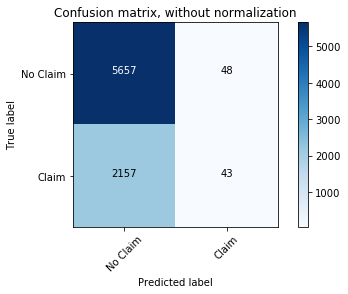

In [163]:
predictions = model.predict_classes(testing)
#encoder = LabelEncoder()
#encoder.fit(testing_target)
#encoded_target = encoder.transform(testing_target)
scores = accuracy_score(testing_target, predictions) 
print(scores)
cm = confusion_matrix(testing_target, predictions)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()

In [158]:
# tring with the PC's
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=2)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
tb = train_sub.values
train_subValues = tb[:,0:219].astype(float)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_sub_target)
encoded_Y = encoder.transform(train_sub_target)


# baseline model

# create model-
model = Sequential()
model.add(Dense(256, input_dim=19, kernel_initializer='normal', activation='relu'))
model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_subValues, encoded_Y,epochs = 50, validation_data  = (testing.values,testing_target.values))
predictions = model.predict_classes(testing.values)
#encoder = LabelEncoder()
#encoder.fit(testing_target)
#encoded_target = encoder.transform(testing_target)
scores = accuracy_score(testing_target, predictions) 
scoresdf = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=2)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
tb = train_sub.values
train_subValues = tb[:,0:219].astype(float)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_sub_target)
encoded_Y = encoder.transform(train_sub_target)


# baseline model

# create model
model = Sequential()
model.add(Dense(256, input_dim=19, kernel_initializer='normal', activation='relu'))
model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_subValues, encoded_Y,epochs = 50, validation_data  = (testing.values,testing_target.values))
predictions = model.predict_classes(testing.values)
#encoder = LabelEncoder()
#encoder.fit(testing_target)
#encoded_target = encoder.transform(testing_target)
scores = accuracy_score(testing_target, predictions) 
scores

Train on 71141 samples, validate on 7905 samples
Epoch 1/50
71141/71141 [==============================] - 4s - loss: 0.5774 - acc: 0.7259 - val_loss: 0.5806 - val_acc: 0.7217
Epoch 2/50
71141/71141 [==============================] - 3s - loss: 0.5747 - acc: 0.7260 - val_loss: 0.5751 - val_acc: 0.7217
Epoch 3/50
71141/71141 [==============================] - 3s - loss: 0.5739 - acc: 0.7260 - val_loss: 0.5768 - val_acc: 0.7217
Epoch 4/50
71141/71141 [==============================] - 3s - loss: 0.5738 - acc: 0.7260 - val_loss: 0.5747 - val_acc: 0.7217
Epoch 5/50
71141/71141 [==============================] - 3s - loss: 0.5734 - acc: 0.7260 - val_loss: 0.5764 - val_acc: 0.7217
Epoch 6/50
71141/71141 [==============================] - 3s - loss: 0.5732 - acc: 0.7260 - val_loss: 0.5758 - val_acc: 0.7217
Epoch 7/50
71141/71141 [==============================] - 4s - loss: 0.5728 - acc: 0.7260 - val_loss: 0.5759 - val_acc: 0.7217
Epoch 8/50
71141/71141 [==============================] - 3s -

KeyboardInterrupt: 

In [58]:
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df['PC3'] = X1[:,2] 
df['PC4'] = X1[:,3] 
df['PC5'] = X1[:,4] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.30, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
tb = train_sub.values
train_subValues = tb[:,0:219].astype(float)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_sub_target)
encoded_Y = encoder.transform(train_sub_target)


# baseline model

# create model
model = Sequential()
model.add(Dense(256, input_dim=22, kernel_initializer='normal', activation='relu'))
model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_subValues, encoded_Y,epochs = 50, validation_data  = (testing.values,testing_target.values))
predictions = model.predict_classes(testing.values)
#encoder = LabelEncoder()
#encoder.fit(testing_target)
#encoded_target = encoder.transform(testing_target)
scores = accuracy_score(testing_target, predictions) 
scores

Train on 174374 samples, validate on 19375 samples
Epoch 1/50
174374/174374 [==============================] - 8s - loss: 0.3477 - acc: 0.8882 - val_loss: 0.3488 - val_acc: 0.8855
Epoch 2/50
174374/174374 [==============================] - 8s - loss: 0.3441 - acc: 0.8883 - val_loss: 0.3492 - val_acc: 0.8855
Epoch 3/50
174374/174374 [==============================] - 7s - loss: 0.3432 - acc: 0.8883 - val_loss: 0.3481 - val_acc: 0.8855
Epoch 4/50
174374/174374 [==============================] - 7s - loss: 0.3428 - acc: 0.8883 - val_loss: 0.3480 - val_acc: 0.8855
Epoch 5/50
174374/174374 [==============================] - 7s - loss: 0.3425 - acc: 0.8883 - val_loss: 0.3482 - val_acc: 0.8855
Epoch 6/50
174374/174374 [==============================] - 7s - loss: 0.3424 - acc: 0.8883 - val_loss: 0.3490 - val_acc: 0.8855
Epoch 7/50
174374/174374 [==============================] - 7s - loss: 0.3421 - acc: 0.8883 - val_loss: 0.3483 - val_acc: 0.8855
Epoch 8/50
174374/174374 [====================

0.87881290322580641

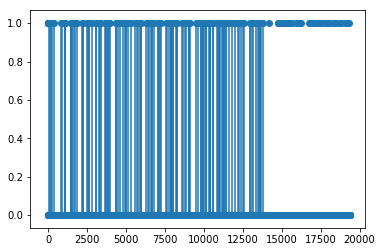

In [63]:
plt.scatter(predictions,testing_target)
plt.show()

In [55]:
# put everyhing and use pca for the continuous.
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.fit_transform(X)
#df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df['PC3'] = X1[:,2] 
df['PC4'] = X1[:,3] 
df['PC5'] = X1[:,4] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.30, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
train = pd.get_dummies(train, columns=categorical_features)
#train = dfsampled.drop(categorical_features, axis =1)

train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
tb = train_sub.values
train_subValues = tb[:,0:219].astype(float)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_sub_target)
encoded_Y = encoder.transform(train_sub_target)


# baseline model

# create model
model = Sequential()
model.add(Dense(256, input_dim=198, kernel_initializer='normal', activation='relu'))
model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_subValues, encoded_Y,epochs = 50, validation_data  = (testing.values,testing_target.values))
predictions = model.predict_classes(testing.values)
#encoder = LabelEncoder()
#encoder.fit(testing_target)
#encoded_target = encoder.transform(testing_target)
scores = accuracy_score(testing_target, predictions) 
scores

Train on 174374 samples, validate on 19375 samples
Epoch 1/50
174374/174374 [==============================] - 12s - loss: 0.3438 - acc: 0.8882 - val_loss: 0.3502 - val_acc: 0.8855
Epoch 2/50
174374/174374 [==============================] - 12s - loss: 0.3401 - acc: 0.8883 - val_loss: 0.3457 - val_acc: 0.8855
Epoch 3/50
174374/174374 [==============================] - 12s - loss: 0.3385 - acc: 0.8883 - val_loss: 0.3453 - val_acc: 0.8855
Epoch 4/50
174374/174374 [==============================] - 12s - loss: 0.3373 - acc: 0.8884 - val_loss: 0.3458 - val_acc: 0.8855
Epoch 5/50
174374/174374 [==============================] - 12s - loss: 0.3361 - acc: 0.8884 - val_loss: 0.3466 - val_acc: 0.8856
Epoch 6/50
174374/174374 [==============================] - 12s - loss: 0.3342 - acc: 0.8884 - val_loss: 0.3479 - val_acc: 0.8856
Epoch 7/50
174374/174374 [==============================] - 12s - loss: 0.3324 - acc: 0.8884 - val_loss: 0.3479 - val_acc: 0.8855
Epoch 8/50
174374/174374 [=============

0.84929032258064519

In [57]:
testing_target.sum()

2219